SO, we are modelling a bucket of water with some concentration of microcystin and some concentration of e-coli with MLRA. The theory is that MLRA should code for microcystinase which should linearise the microcystin. 

![image](./mod_meet1.png)




In [ ]:
initial_conc_ecoli = 1e12 #cells per l
#http://book.bionumbers.org/what-is-the-concentration-of-bacterial-cells-in-a-saturated-culture/ says about 109 cells per ml
enzymes_per_min = 1e5 # per e coli
conc_enzymes_initial = initial_conc_ecoli * 1 #lambda t: initial_conc_ecoli * enzymes_per_min * t
initial_conc_microcystin = 500 #micrograms per litre 995.2 AMU soo
initial_nmolecules_microcystin = (500 * 10**(-6) / 995.2) * 6.023 * 10**23
# https://www.who.int/water_sanitation_health/resourcesquality/toxcyanchap5.pdf pretty toxic
initial_nmolecules_microcystin

3.026024919614147e+17

So, hypothesis is that the rate of microcystin degradation is proportional to the concentration of the microcystin and the concentration of enzymes

Text(0.5, 1.0, 'MC-LR Molecules in one Liter of Water with 109 E-coli per mL')

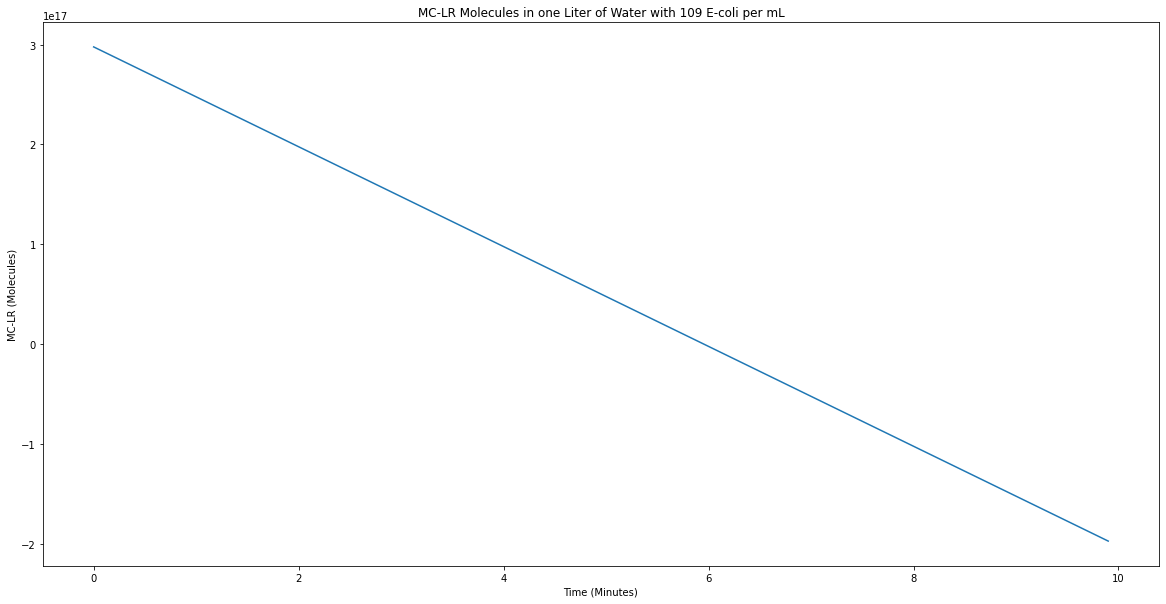

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

microcystin_conc = initial_nmolecules_microcystin #initial no of microcystin molecules
conc_enzymes = conc_enzymes_initial # initial no of enzymes
conc_at_t = []; #array that's filled up with the concentration at various timestepes
end_t_in_minutes = 10
time_step = 0.1
time_range = np.arange(0,end_t_in_minutes, time_step)
for t in time_range: #arange gives times in linear steps of resolution minutes
    reduc_microcystin_per_time_step = 10**17 * conc_enzymes * microcystin_conc * time_step
    if(reduc_microcystin_per_time_step >= conc_enzymes):  #if the reduction in microcystin is greater than the no. of enzymes, then that makes no sense
        reduc_microcystin_per_time_step = conc_enzymes #so set that equal to number of enzymes
    #elif(reduc_microcystin >= microcystin_conc ): reduc_microcystin = microcystin_conc
    conc_enzymes +=  enzymes_per_min * initial_conc_ecoli * time_step - 0.1*reduc_microcystin_per_time_step #let enzyme die if it reduces microcystin, then one gone per.
    #microcystin_conc -= reduc_microcystin_per_time_step
    microcystin_conc -= 0.05 * 10**(-6) * 10**23
    conc_at_t.append(microcystin_conc)


fig, ax = plt.subplots(figsize=[20,10])
ax.plot(time_range,conc_at_t)
ax.set_xlabel("Time (Minutes)")
ax.set_ylabel("MC-LR (Molecules)")
#ax.set_ylim(100,0.5*10**18)
#ax.set_xlim(0,600)
#ax.set_yscale("log")
ax.set_title("MC-LR Molecules in one Liter of Water with 109 E-coli per mL")

0.05 $\mu M$ per minute

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f409621e-76dd-4996-a5b6-14007977fed3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>